In [1]:
import numpy as np
# Importing Pandas Library 
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import *
import os
import joblib
from sklearn.preprocessing import MinMaxScaler
from utils import *

from tensorflow.keras.models import Model, load_model

from models.EEGNet import *

from sklearn.metrics import confusion_matrix

from preprocessing import *

2024-10-07 18:22:32.903437: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-07 18:22:32.910280: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 18:22:32.917859: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-07 18:22:32.920090: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-07 18:22:32.926254: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
model = load_model(r'./checkpoints/orthogonal_2.keras')
model.summary()

I0000 00:00:1728300153.656626   34935 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728300153.681734   34935 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728300153.685945   34935 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728300153.690536   34935 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ eyebrows input      │ (None, 4, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ left input          │ (None, 4, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ right input         │ (None, 4, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ both input          │ (None, 4, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teeth input         │ (None, 4, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ eyebrows            │ (None, 64)        │      2,848 │ eyebrows          │
│ (Functional)        │                   │            │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ left (Functional)   │ (None, 64)        │      2,848 │ left input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ right (Functional)  │ (None, 40)        │      1,160 │ right input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ both (Functional)   │ (None, 128)       │     12,608 │ both input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teeth (Functional)  │ (None, 128)       │     10,624 │ teeth input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 424)       │          0 │ eyebrows[0][0],   │
│ (Concatenate)       │                   │            │ left[0][0],       │
│                     │                   │            │ right[0][0],      │
│                     │                   │            │ both[0][0],       │
│                     │                   │            │ teeth[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 768)       │    326,400 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 128, 6)    │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ softmax             │ (None, 128, 6)    │          0 │ reshape[0][0]     │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,066,874 (4.07 MB)

 Trainable params: 355,192 (1.35 MB)

 Non-trainable params: 1,296 (5.06 KB)

 Optimizer params: 710,386 (2.71 MB)

In [4]:
df_eyebrows = pd.read_csv(r'./inference_data/eyebrows.csv').drop(columns=['timestamps', 'Right AUX'])
df_left = pd.read_csv(r'./inference_data/left.csv').drop(columns=['timestamps', 'Right AUX'])
df_right = pd.read_csv(r'./inference_data/right.csv').drop(columns=['timestamps', 'Right AUX'])
df_both = pd.read_csv(r'./inference_data/both.csv').drop(columns=['timestamps', 'Right AUX'])
df_teeth = pd.read_csv(r'./inference_data/teeth.csv').drop(columns=['timestamps', 'Right AUX'])

In [5]:
label_name = ['eyebrows', 'left', 'right', 'both', 'teeth']
scalers = {}
for label in label_name:
    scalers[label] = joblib.load(rf'./pipeline_{label}/checkpoints/scaler.save')

In [6]:
filters = {
    'left': filter_left,
    'right': filter_right,
    'both': filter_both,
    'teeth': filter_teeth,
    'eyebrows': filter_eyebrows,
}

In [7]:
def get_input(df):
    time_step = 128
    data = df.to_numpy()
    input_data = []
    
    for i in range(0, data.shape[0] // time_step * time_step, time_step):
        x_eyebrows = pipeline(data, filters['eyebrows'], scalers['eyebrows'], i, time_step)
        x_left = pipeline(data, filters['left'], scalers['left'], i, time_step)
        x_right = pipeline(data, filters['right'], scalers['right'], i, time_step)
        x_both = pipeline(data, filters['both'], scalers['both'], i, time_step)
        x_teeth = pipeline(data, filters['teeth'], scalers['teeth'], i, time_step)
        input_data.append(
            np.concatenate(
                [
                    x_eyebrows,
                    x_left,
                    x_right,
                    x_both,
                    x_teeth
                ],
                axis=1
            )
        )

    input_data = np.array(input_data)
    input_data = input_data[:, :, :, np.newaxis]
    input_data = input_data.transpose(0, 2, 1, 3)
    print(input_data.shape)
    
    return data, np.array(input_data)

In [8]:
def get_output(input_data):
    y_pred = model.predict([
        input_data[:, :4], 
        input_data[:, 4:8], 
        input_data[:, 8:12],
        input_data[:, 12:16],
        input_data[:, 16:20]
    ])
    y_pred = np.argmax(y_pred, axis=2)
    y_pred = np.concatenate(y_pred, axis=0)
    y_pred_onehot = np.zeros((y_pred.size, 6))
    y_pred_onehot[np.arange(y_pred.size), y_pred] = 1

    return y_pred_onehot

In [9]:
def plot_data_result(data, y_pred_onehot, title):
    plt.figure(figsize=(50, 30)).suptitle(title, fontsize=40)
    plt.subplot(9, 1, 1)
    plt.title("TP9", fontsize=40)
    plt.plot(data[:, 0])
    plt.subplot(9, 1, 2)
    plt.title("AF7", fontsize=40)
    plt.plot(data[:, 1])
    plt.subplot(9, 1, 3)
    plt.title("AF8", fontsize=40)
    plt.plot(data[:, 2])
    plt.subplot(9, 1, 4)
    plt.title("TP10", fontsize=40)
    plt.plot(data[:, 3])
    plt.subplot(9, 1, 5)
    plt.title("Result eyebrows", fontsize=40)
    plt.plot(y_pred_onehot[:, 1])
    plt.subplot(9, 1, 6)
    plt.title("Result left", fontsize=40)
    plt.plot(y_pred_onehot[:, 2])
    plt.subplot(9, 1, 7)
    plt.title("Result right", fontsize=40)
    plt.plot(y_pred_onehot[:, 3])
    plt.subplot(9, 1, 8)
    plt.title("Result both", fontsize=40)
    plt.plot(y_pred_onehot[:, 4])
    plt.subplot(9, 1, 9)
    plt.title("Result teeth", fontsize=40)
    plt.plot(y_pred_onehot[:, 5])

(70, 20, 128, 1)


I0000 00:00:1728300154.925333   35071 service.cc:146] XLA service 0x771ee8006c50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728300154.925355   35071 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-10-07 18:22:34.938330: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-07 18:22:34.997384: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step

I0000 00:00:1728300155.620853   35071 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step


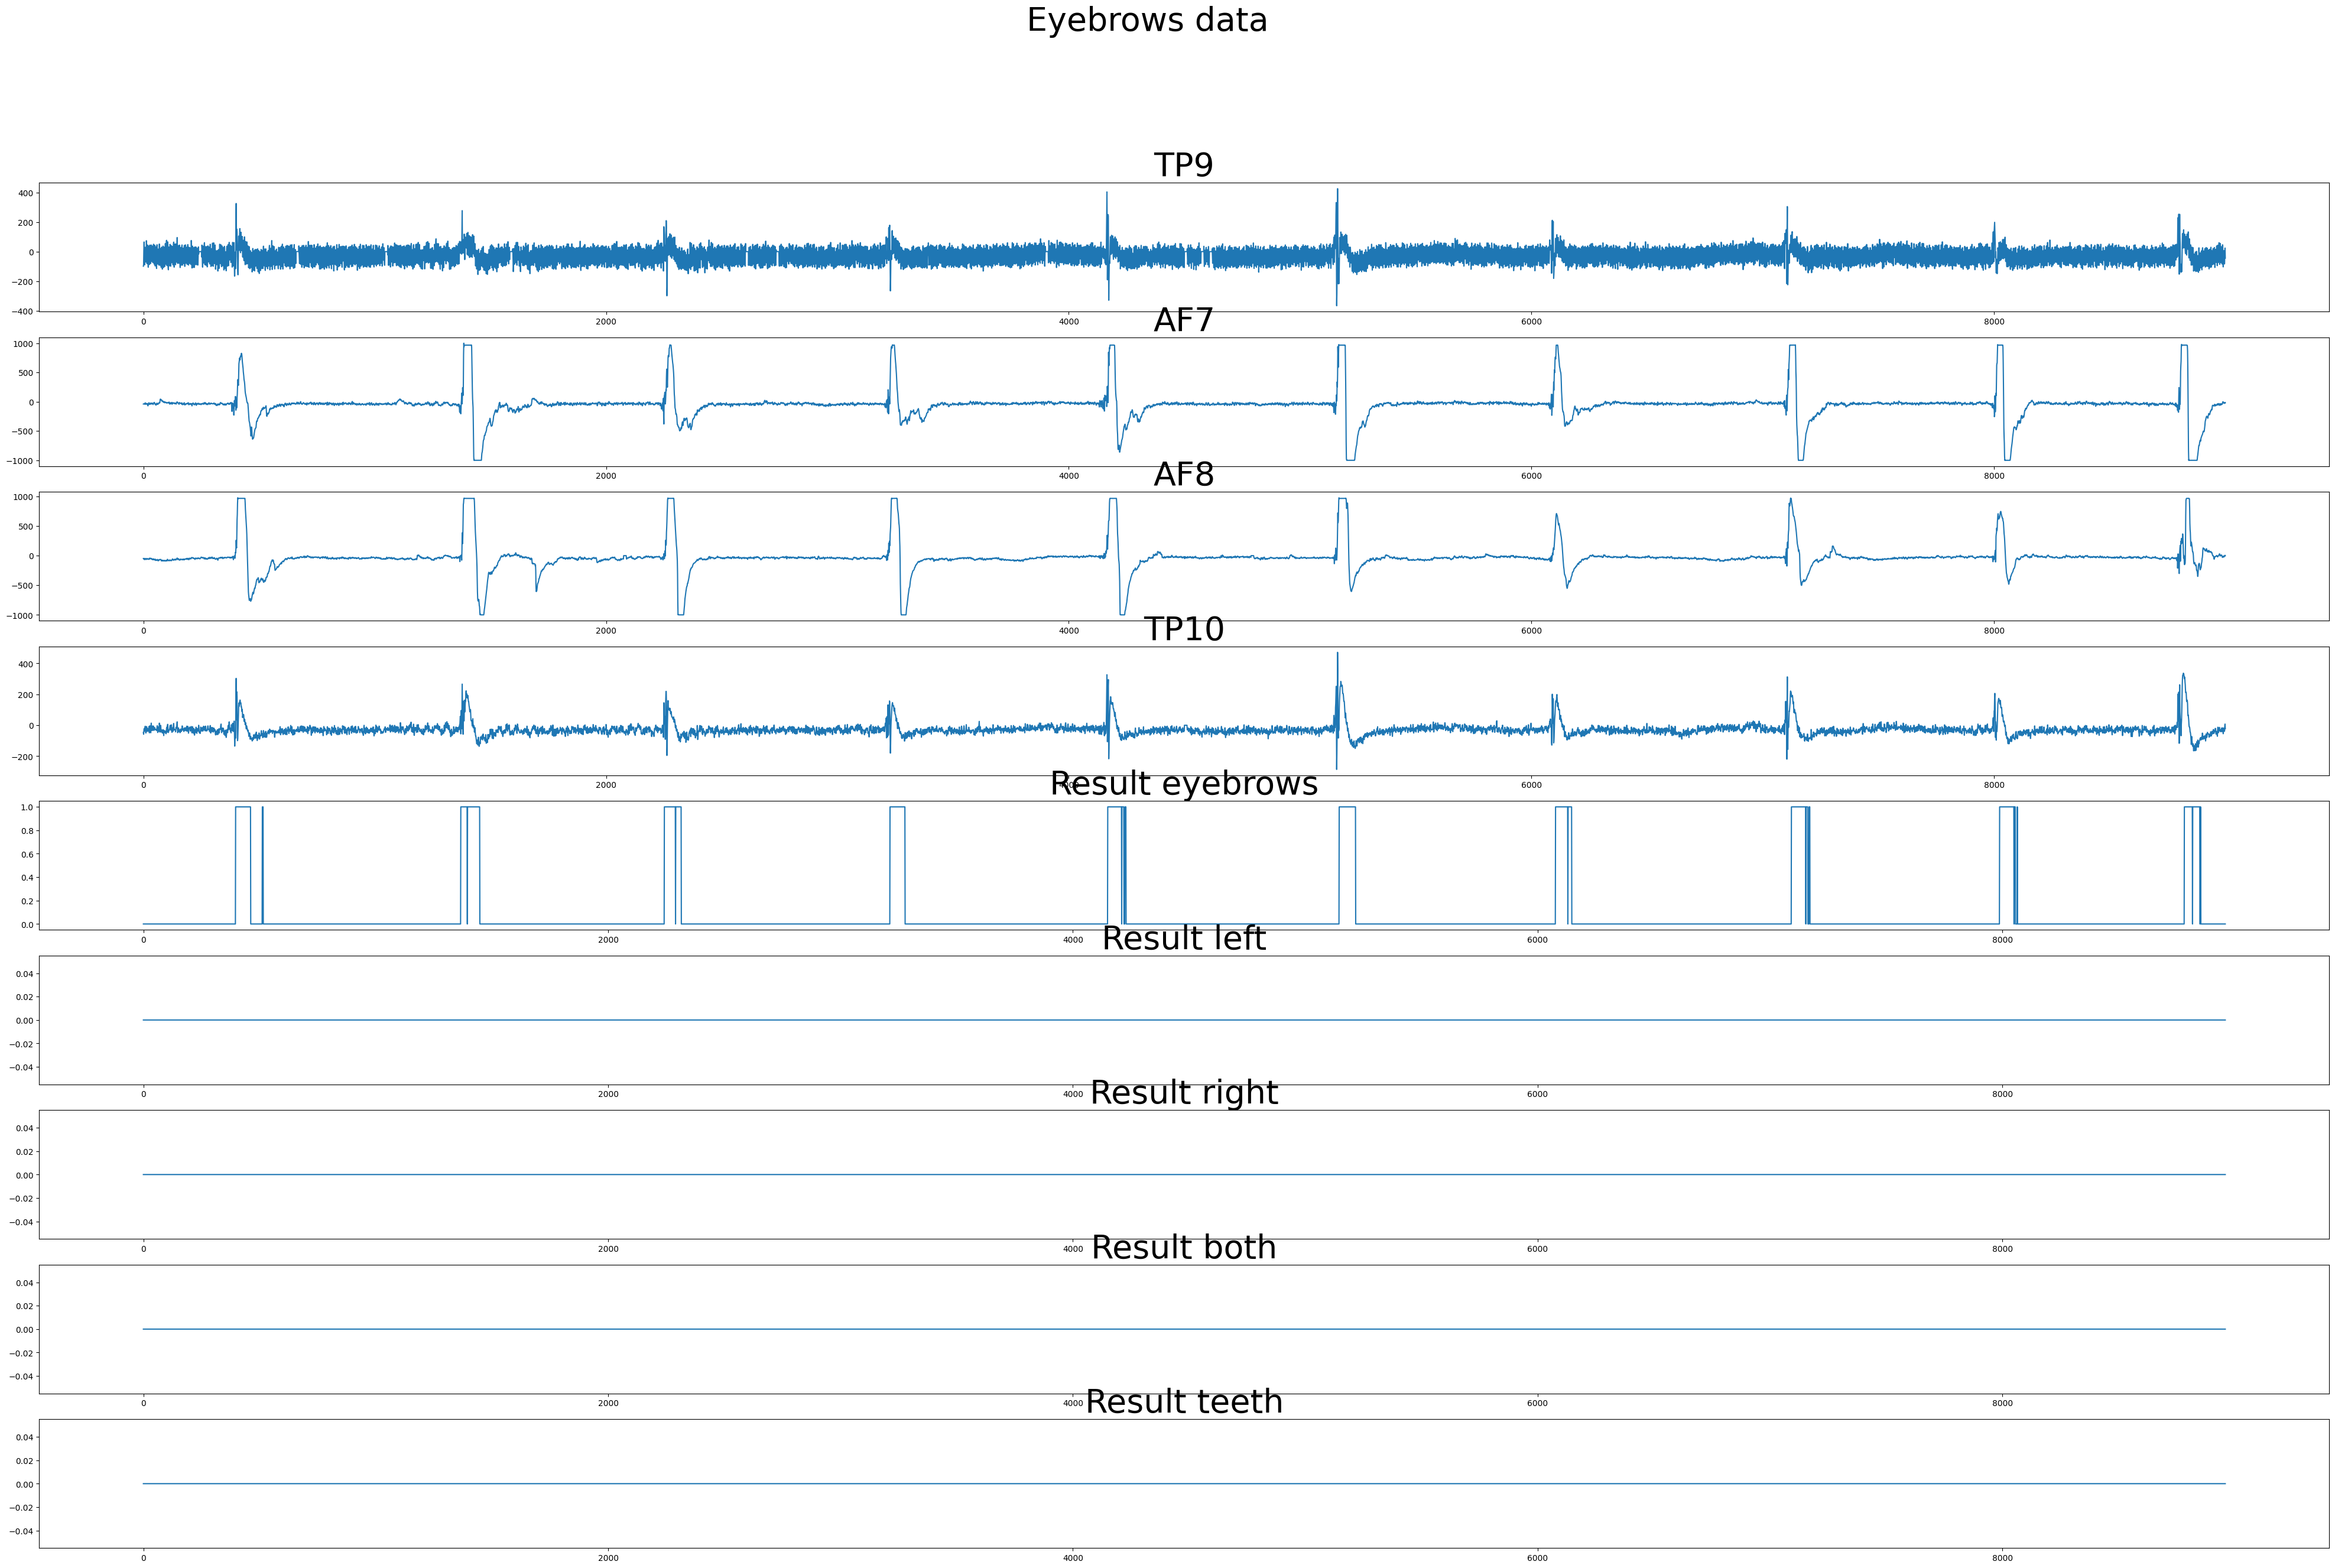

In [10]:
data, input_data = get_input(df_eyebrows)
y_pred_onehot = get_output(input_data)
plot_data_result(data, y_pred_onehot, "Eyebrows data")

(70, 20, 128, 1)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


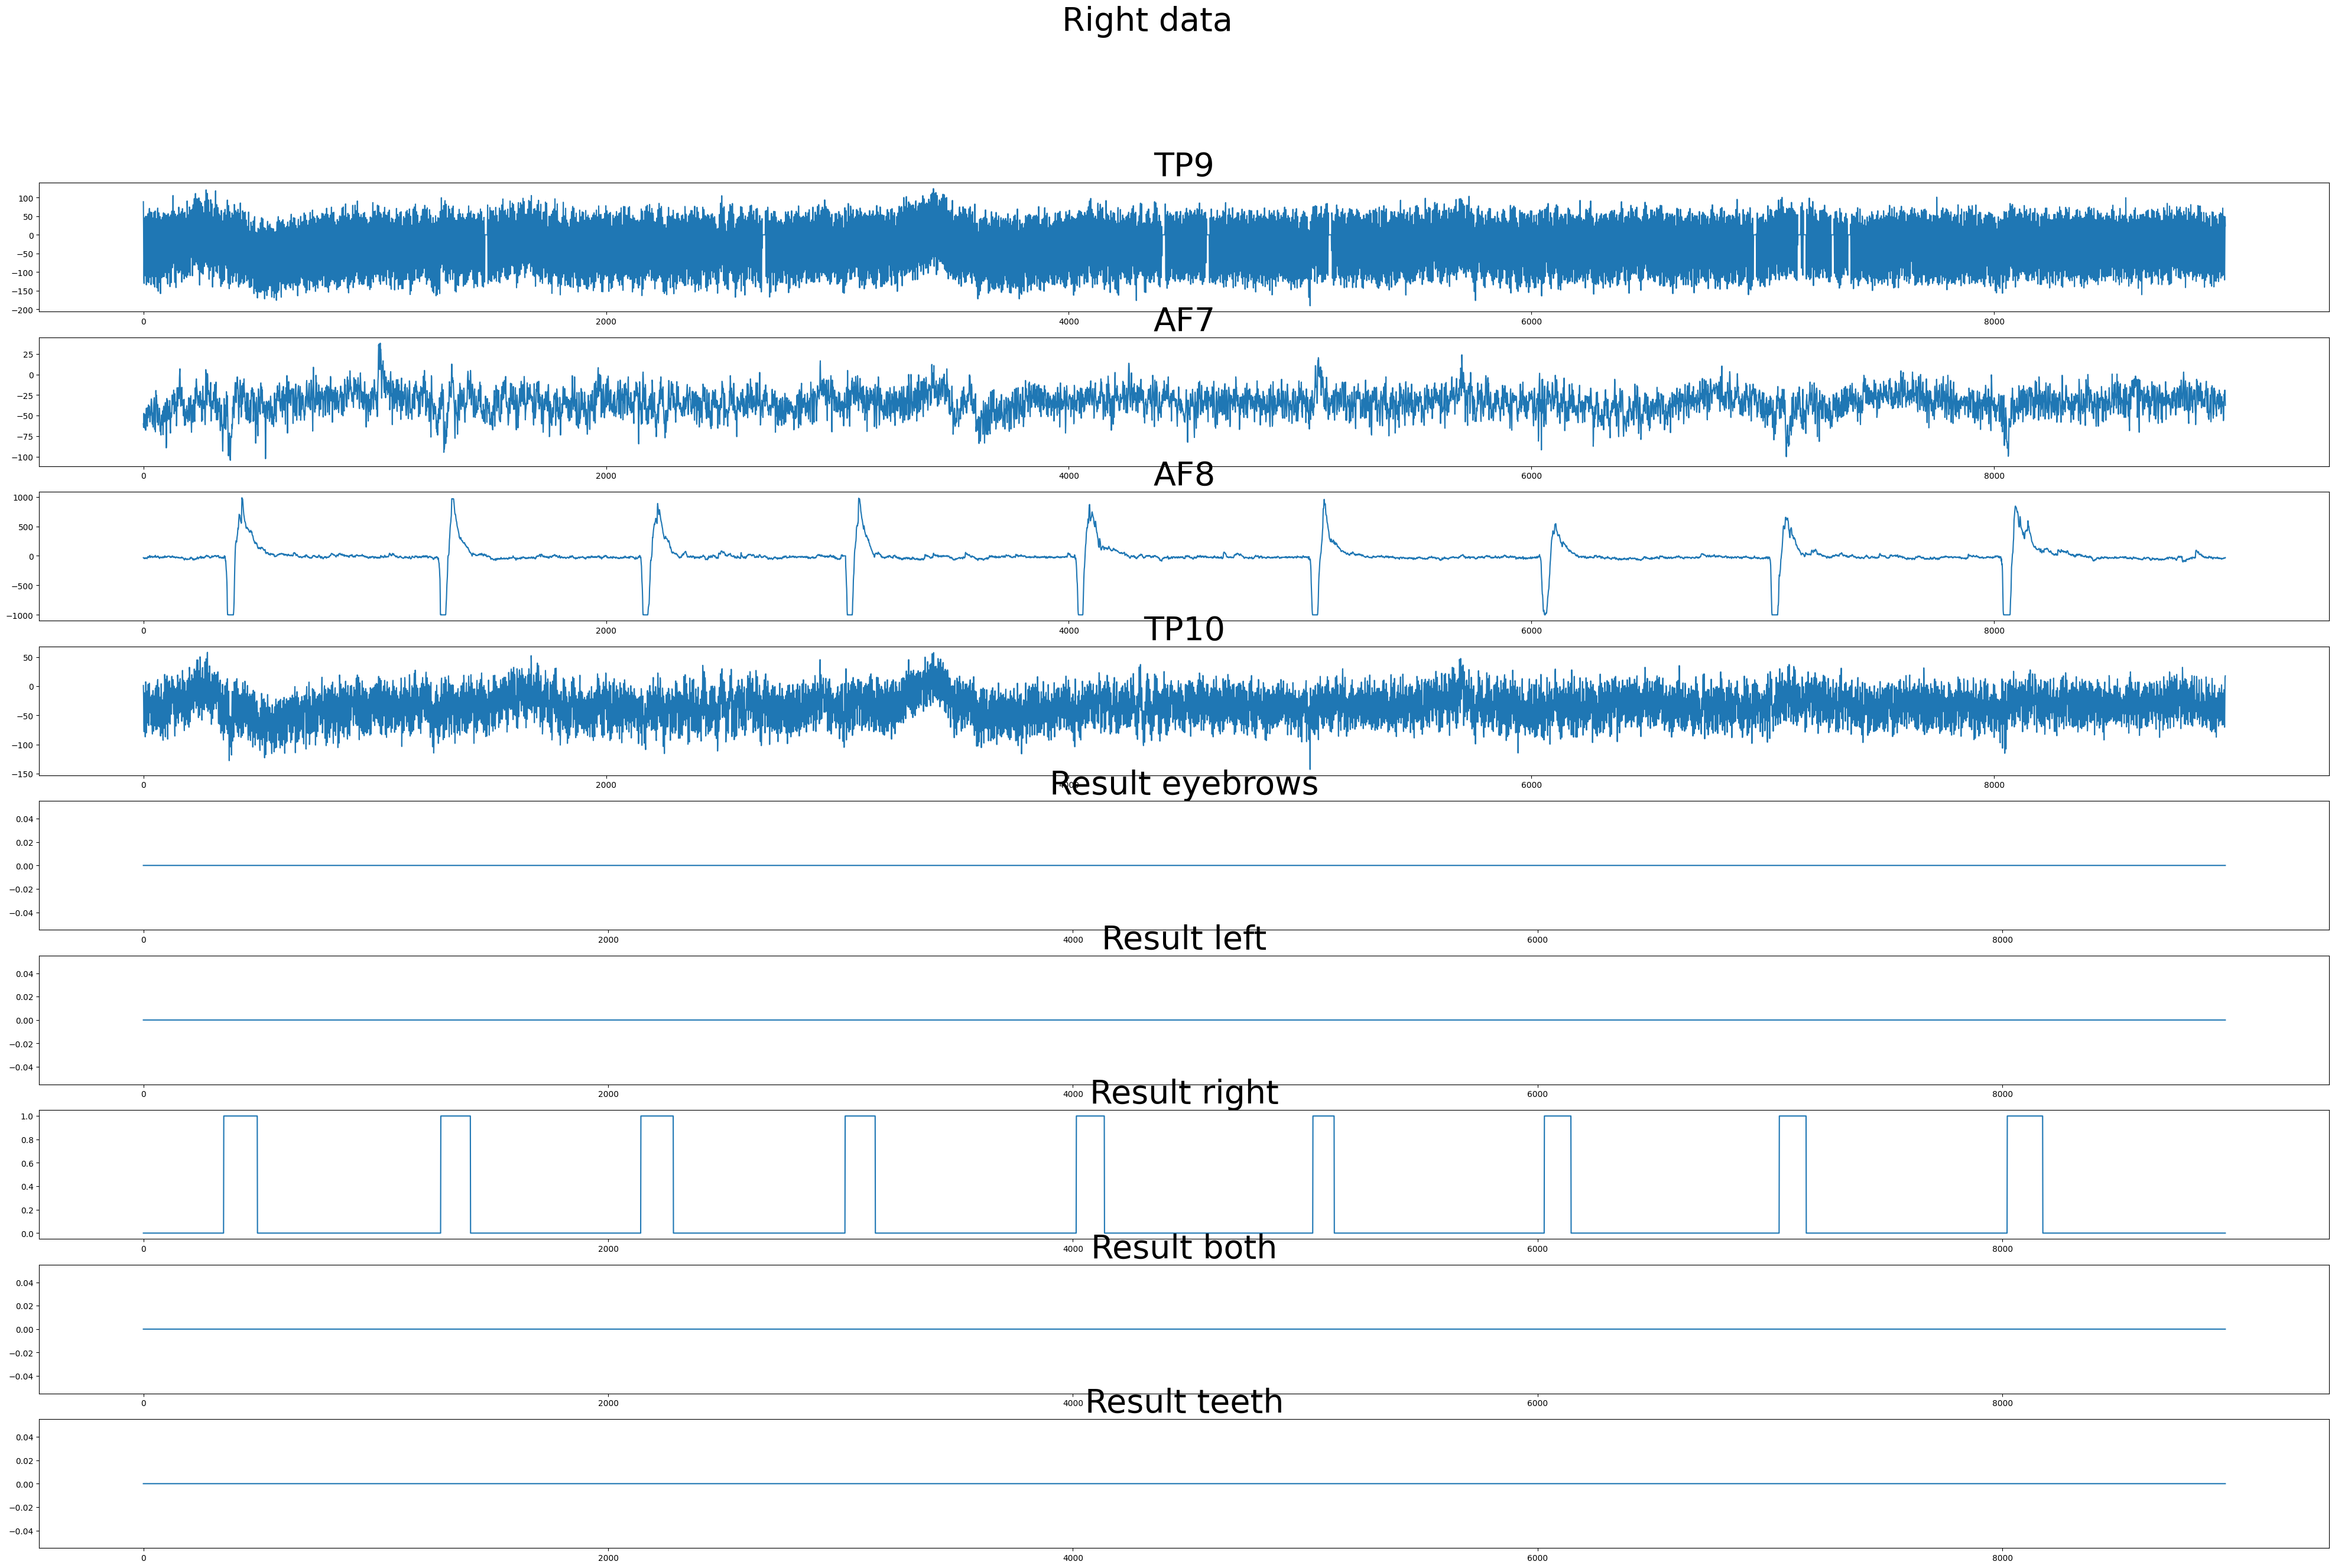

In [11]:
# Eyebrows inference dataset
data, input_data = get_input(df_right)
y_pred_onehot = get_output(input_data)
plot_data_result(data, y_pred_onehot, "Right data")

(70, 20, 128, 1)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


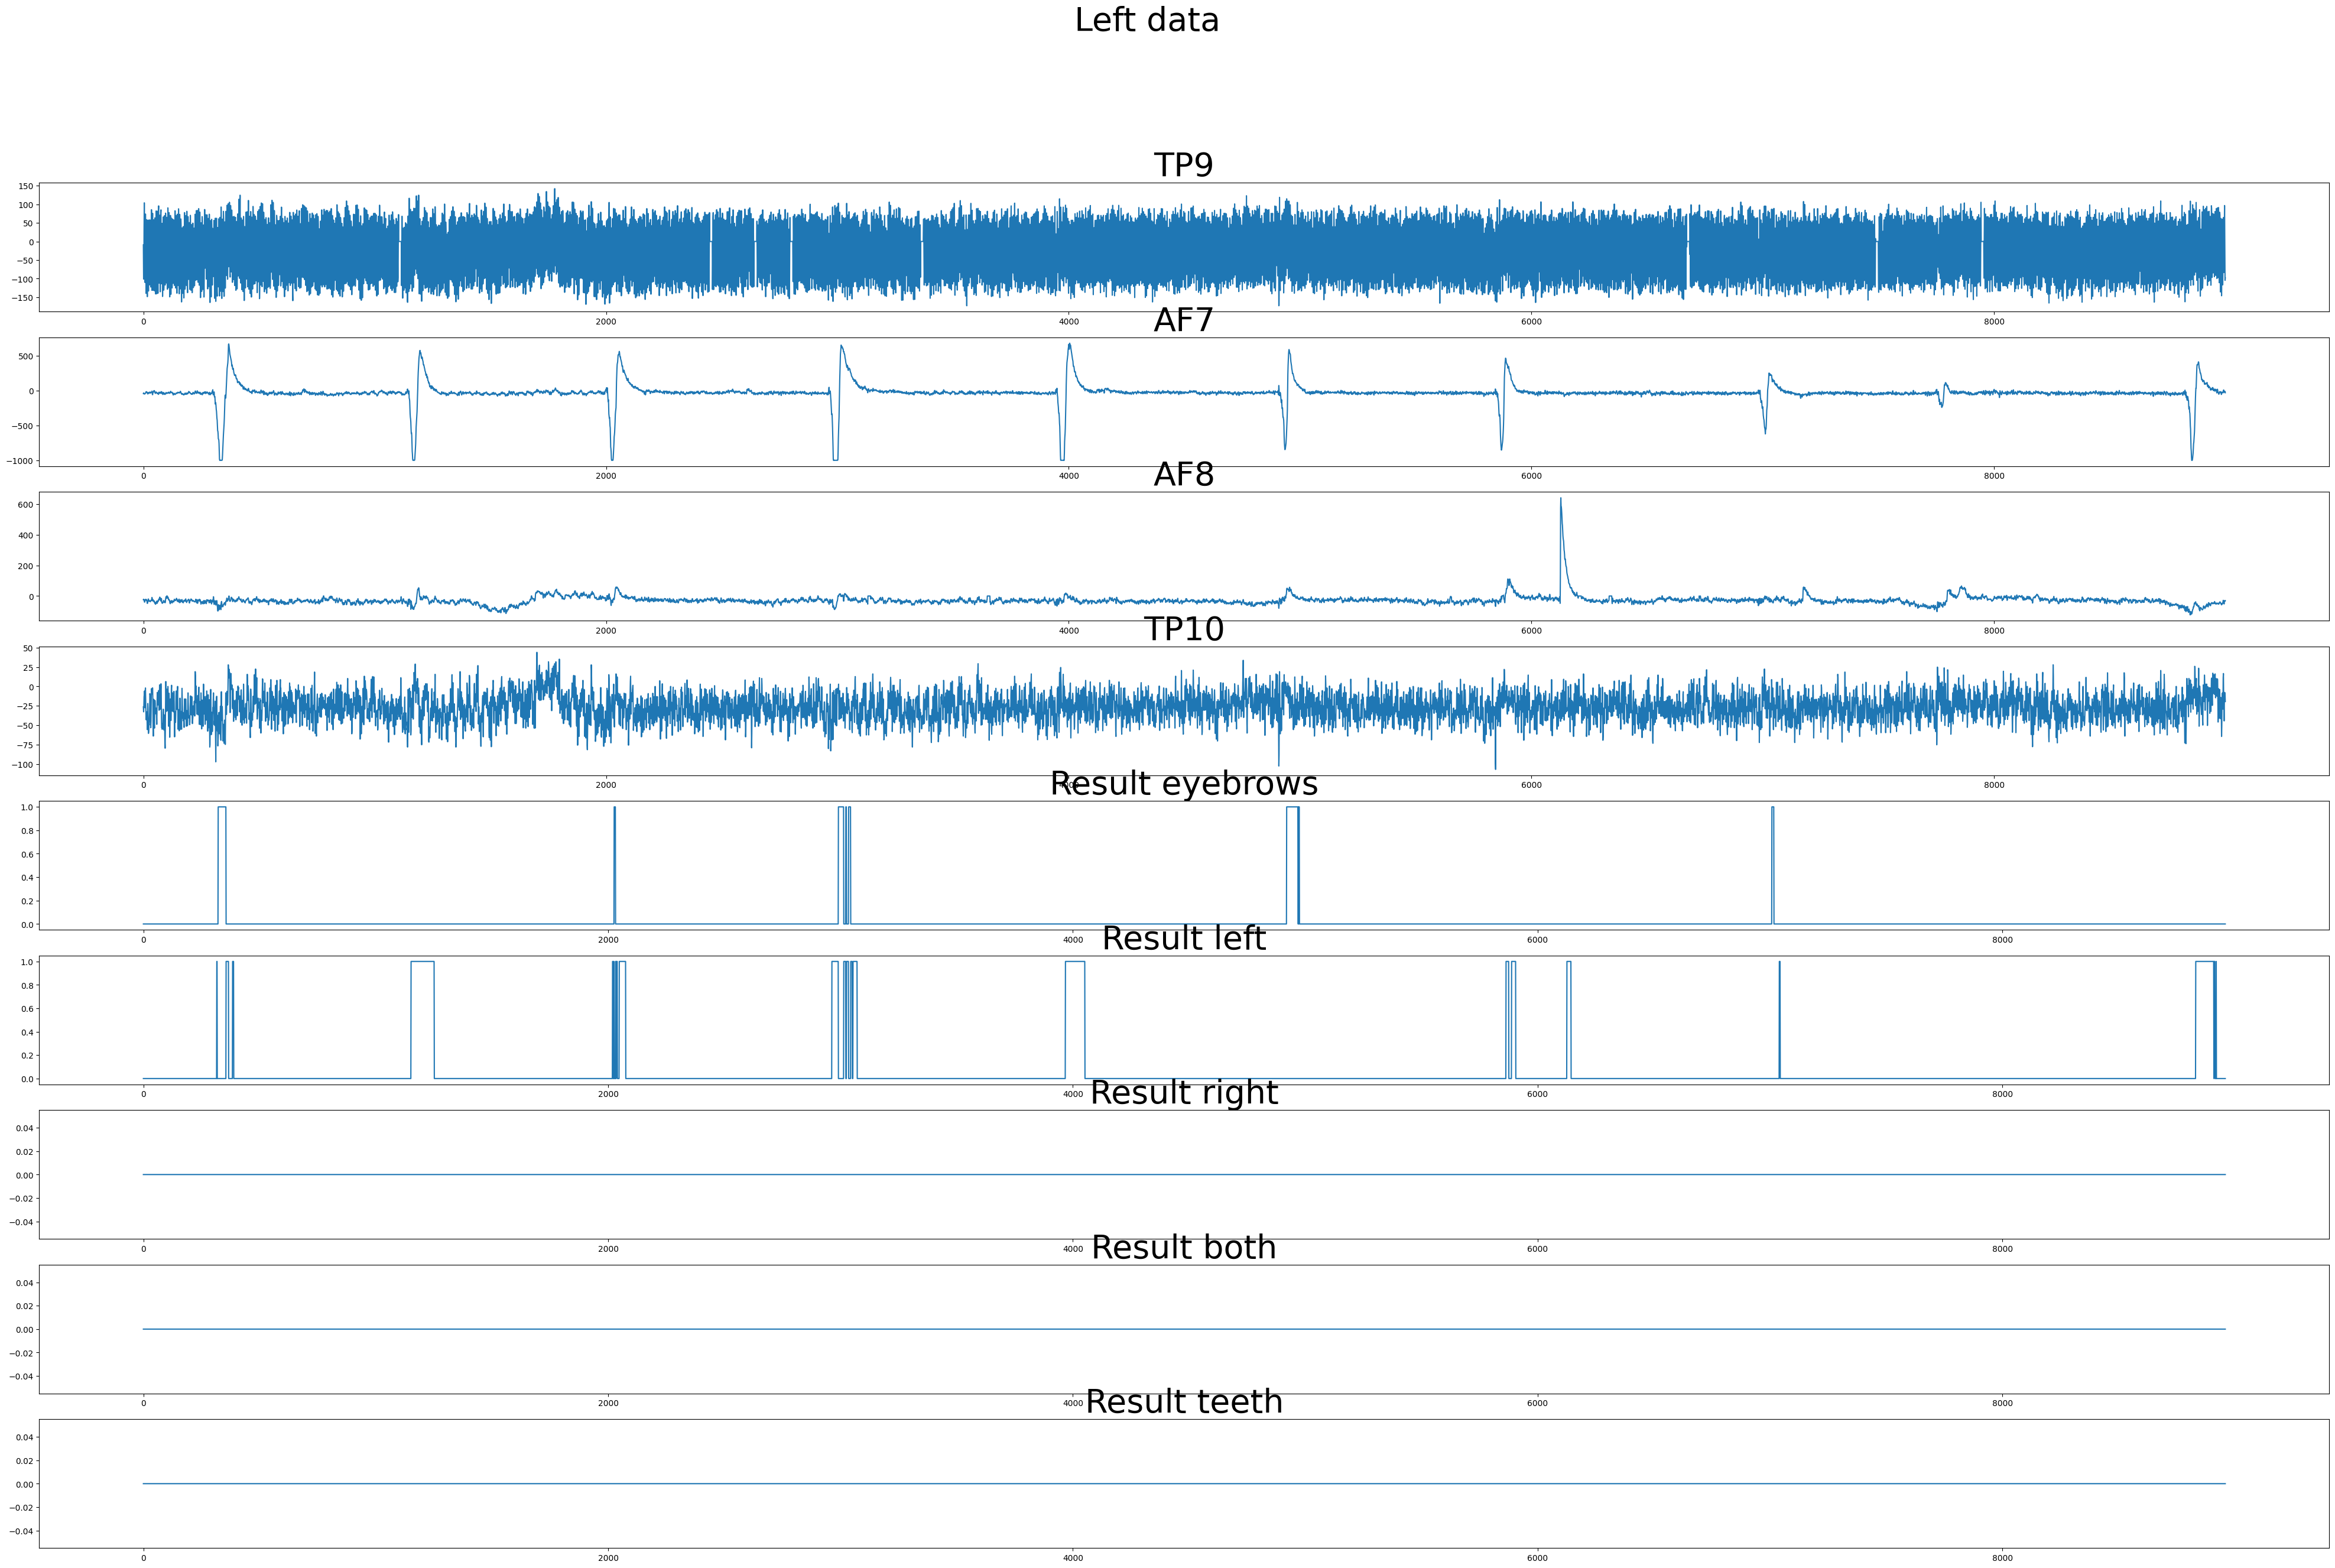

In [12]:
# Eyebrows inference dataset
data, input_data = get_input(df_left)
y_pred_onehot = get_output(input_data)
plot_data_result(data, y_pred_onehot, "Left data")

(80, 20, 128, 1)
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step


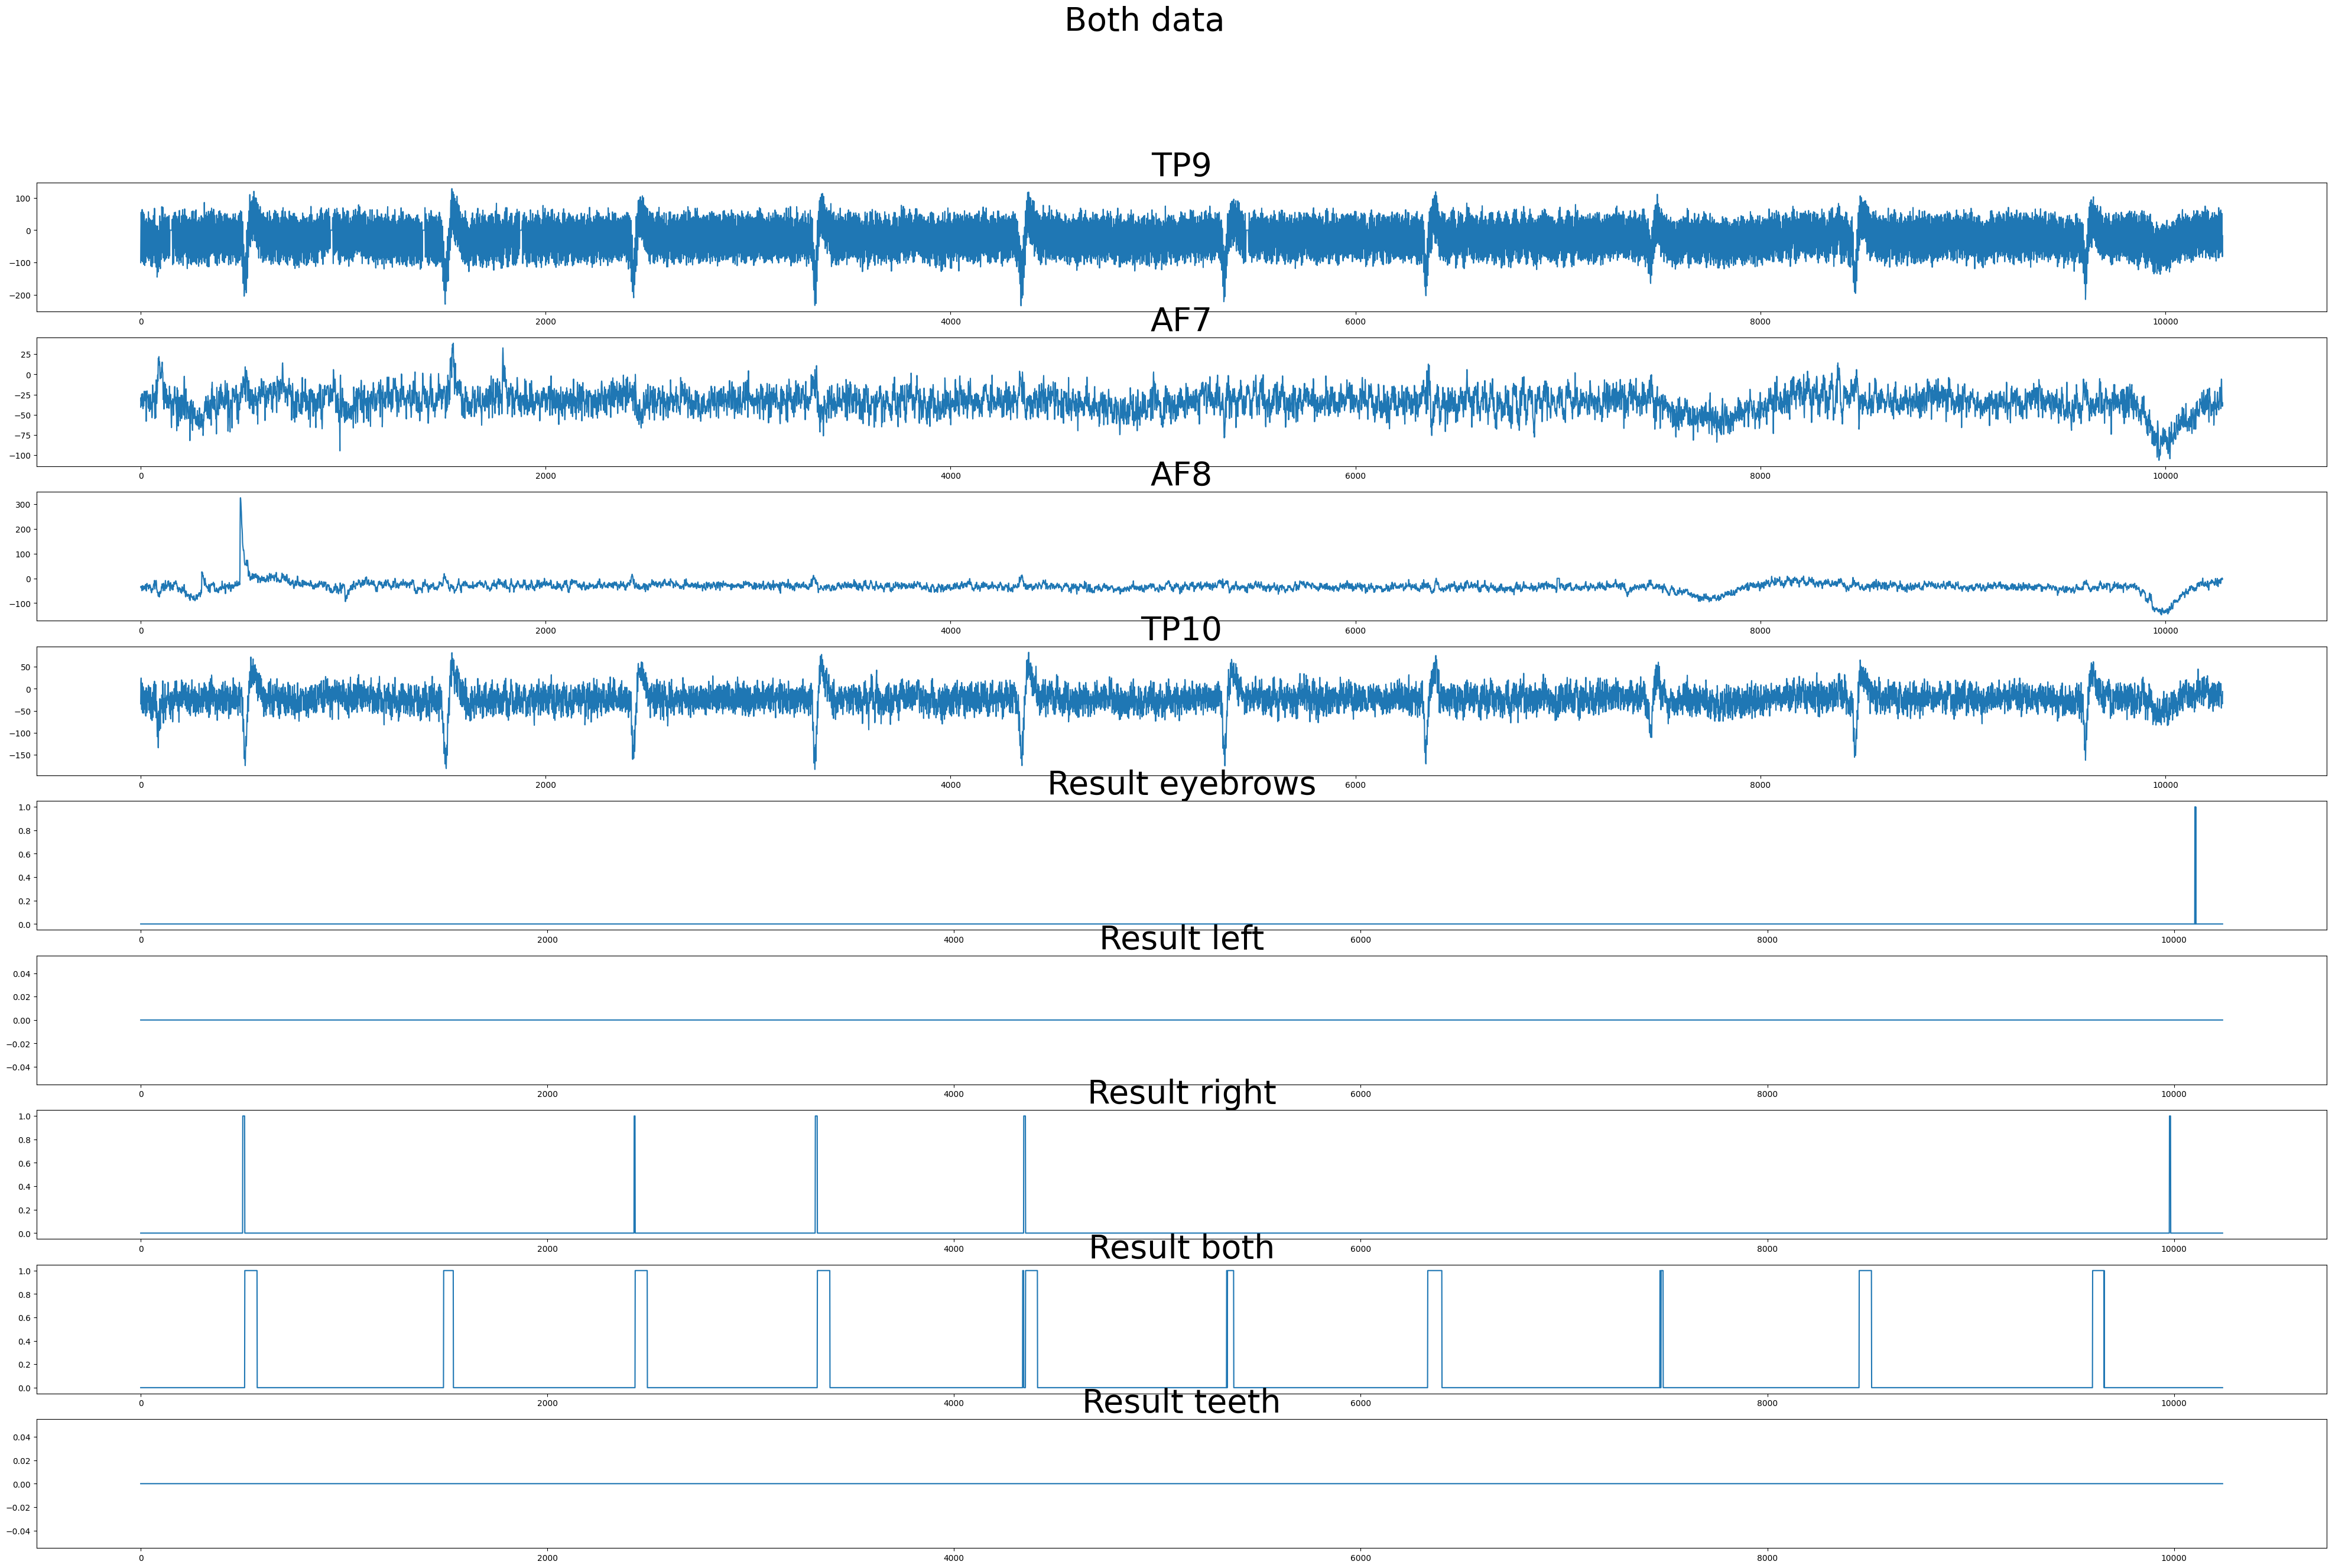

In [13]:
# Eyebrows inference dataset
data, input_data = get_input(df_both)
y_pred_onehot = get_output(input_data)
plot_data_result(data, y_pred_onehot, "Both data")

(60, 20, 128, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


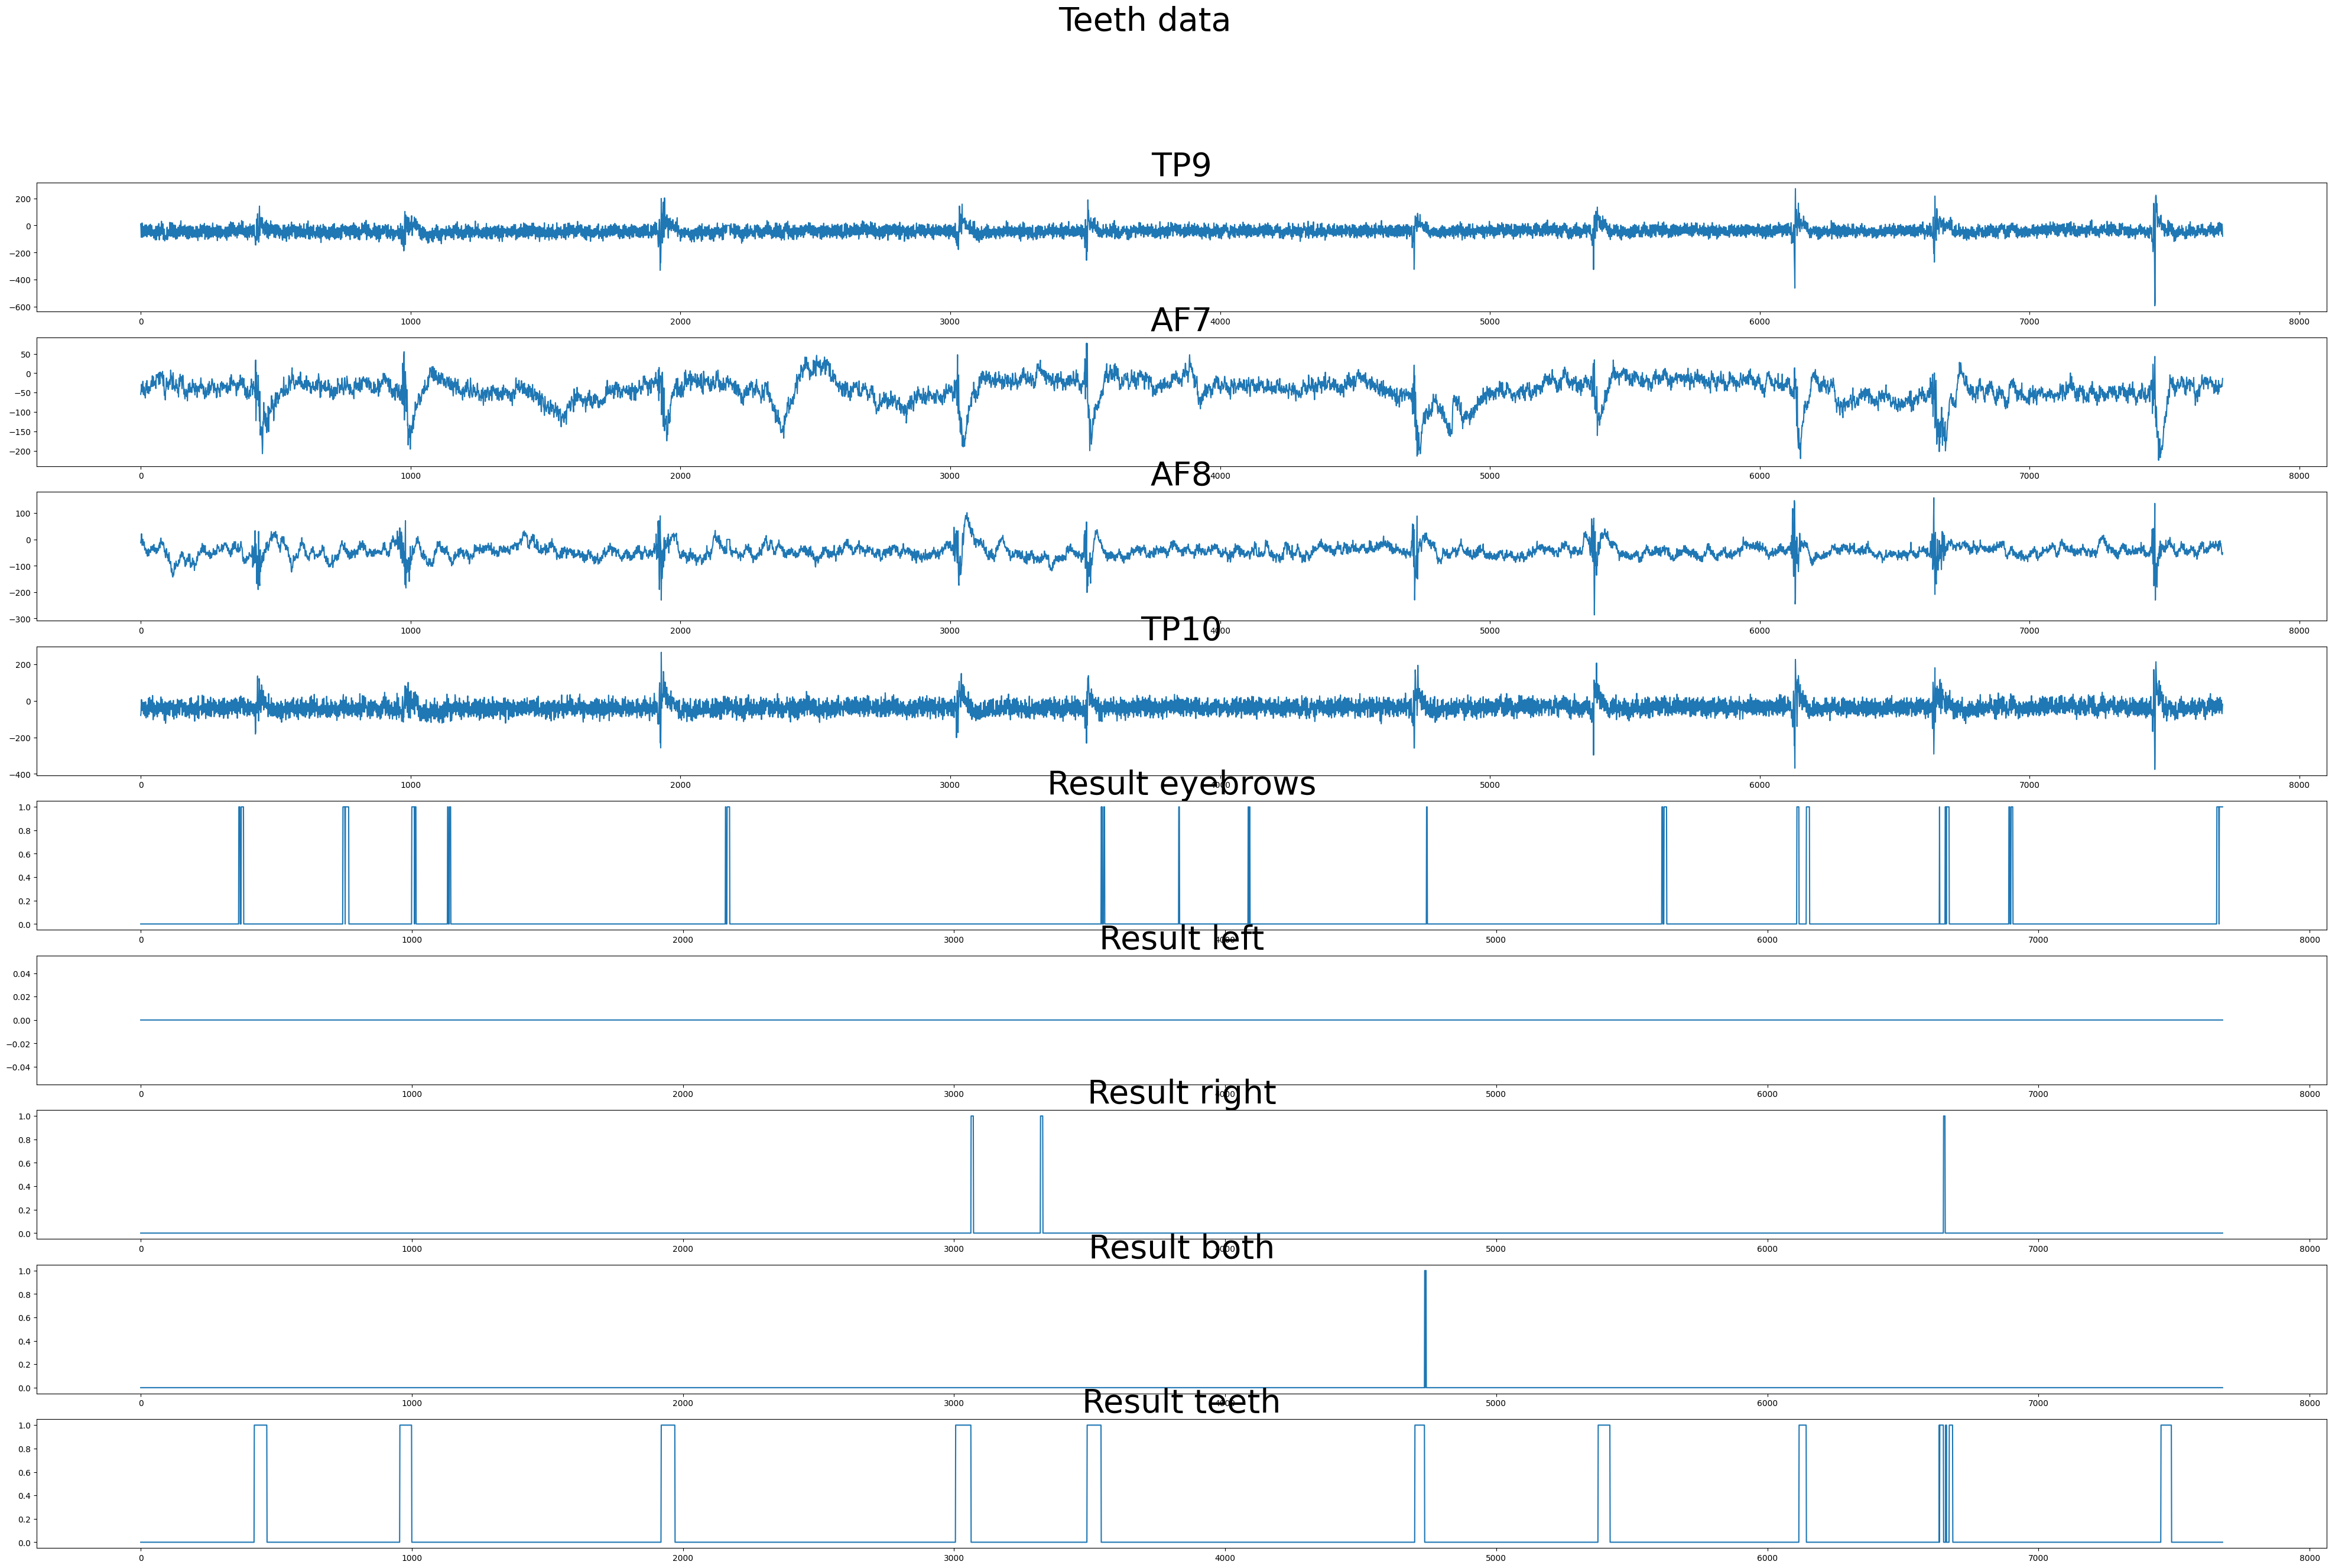

In [14]:
# Eyebrows inference dataset
data, input_data = get_input(df_teeth)
y_pred_onehot = get_output(input_data)
plot_data_result(data, y_pred_onehot, "Teeth data")

(100, 20, 128, 1)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step


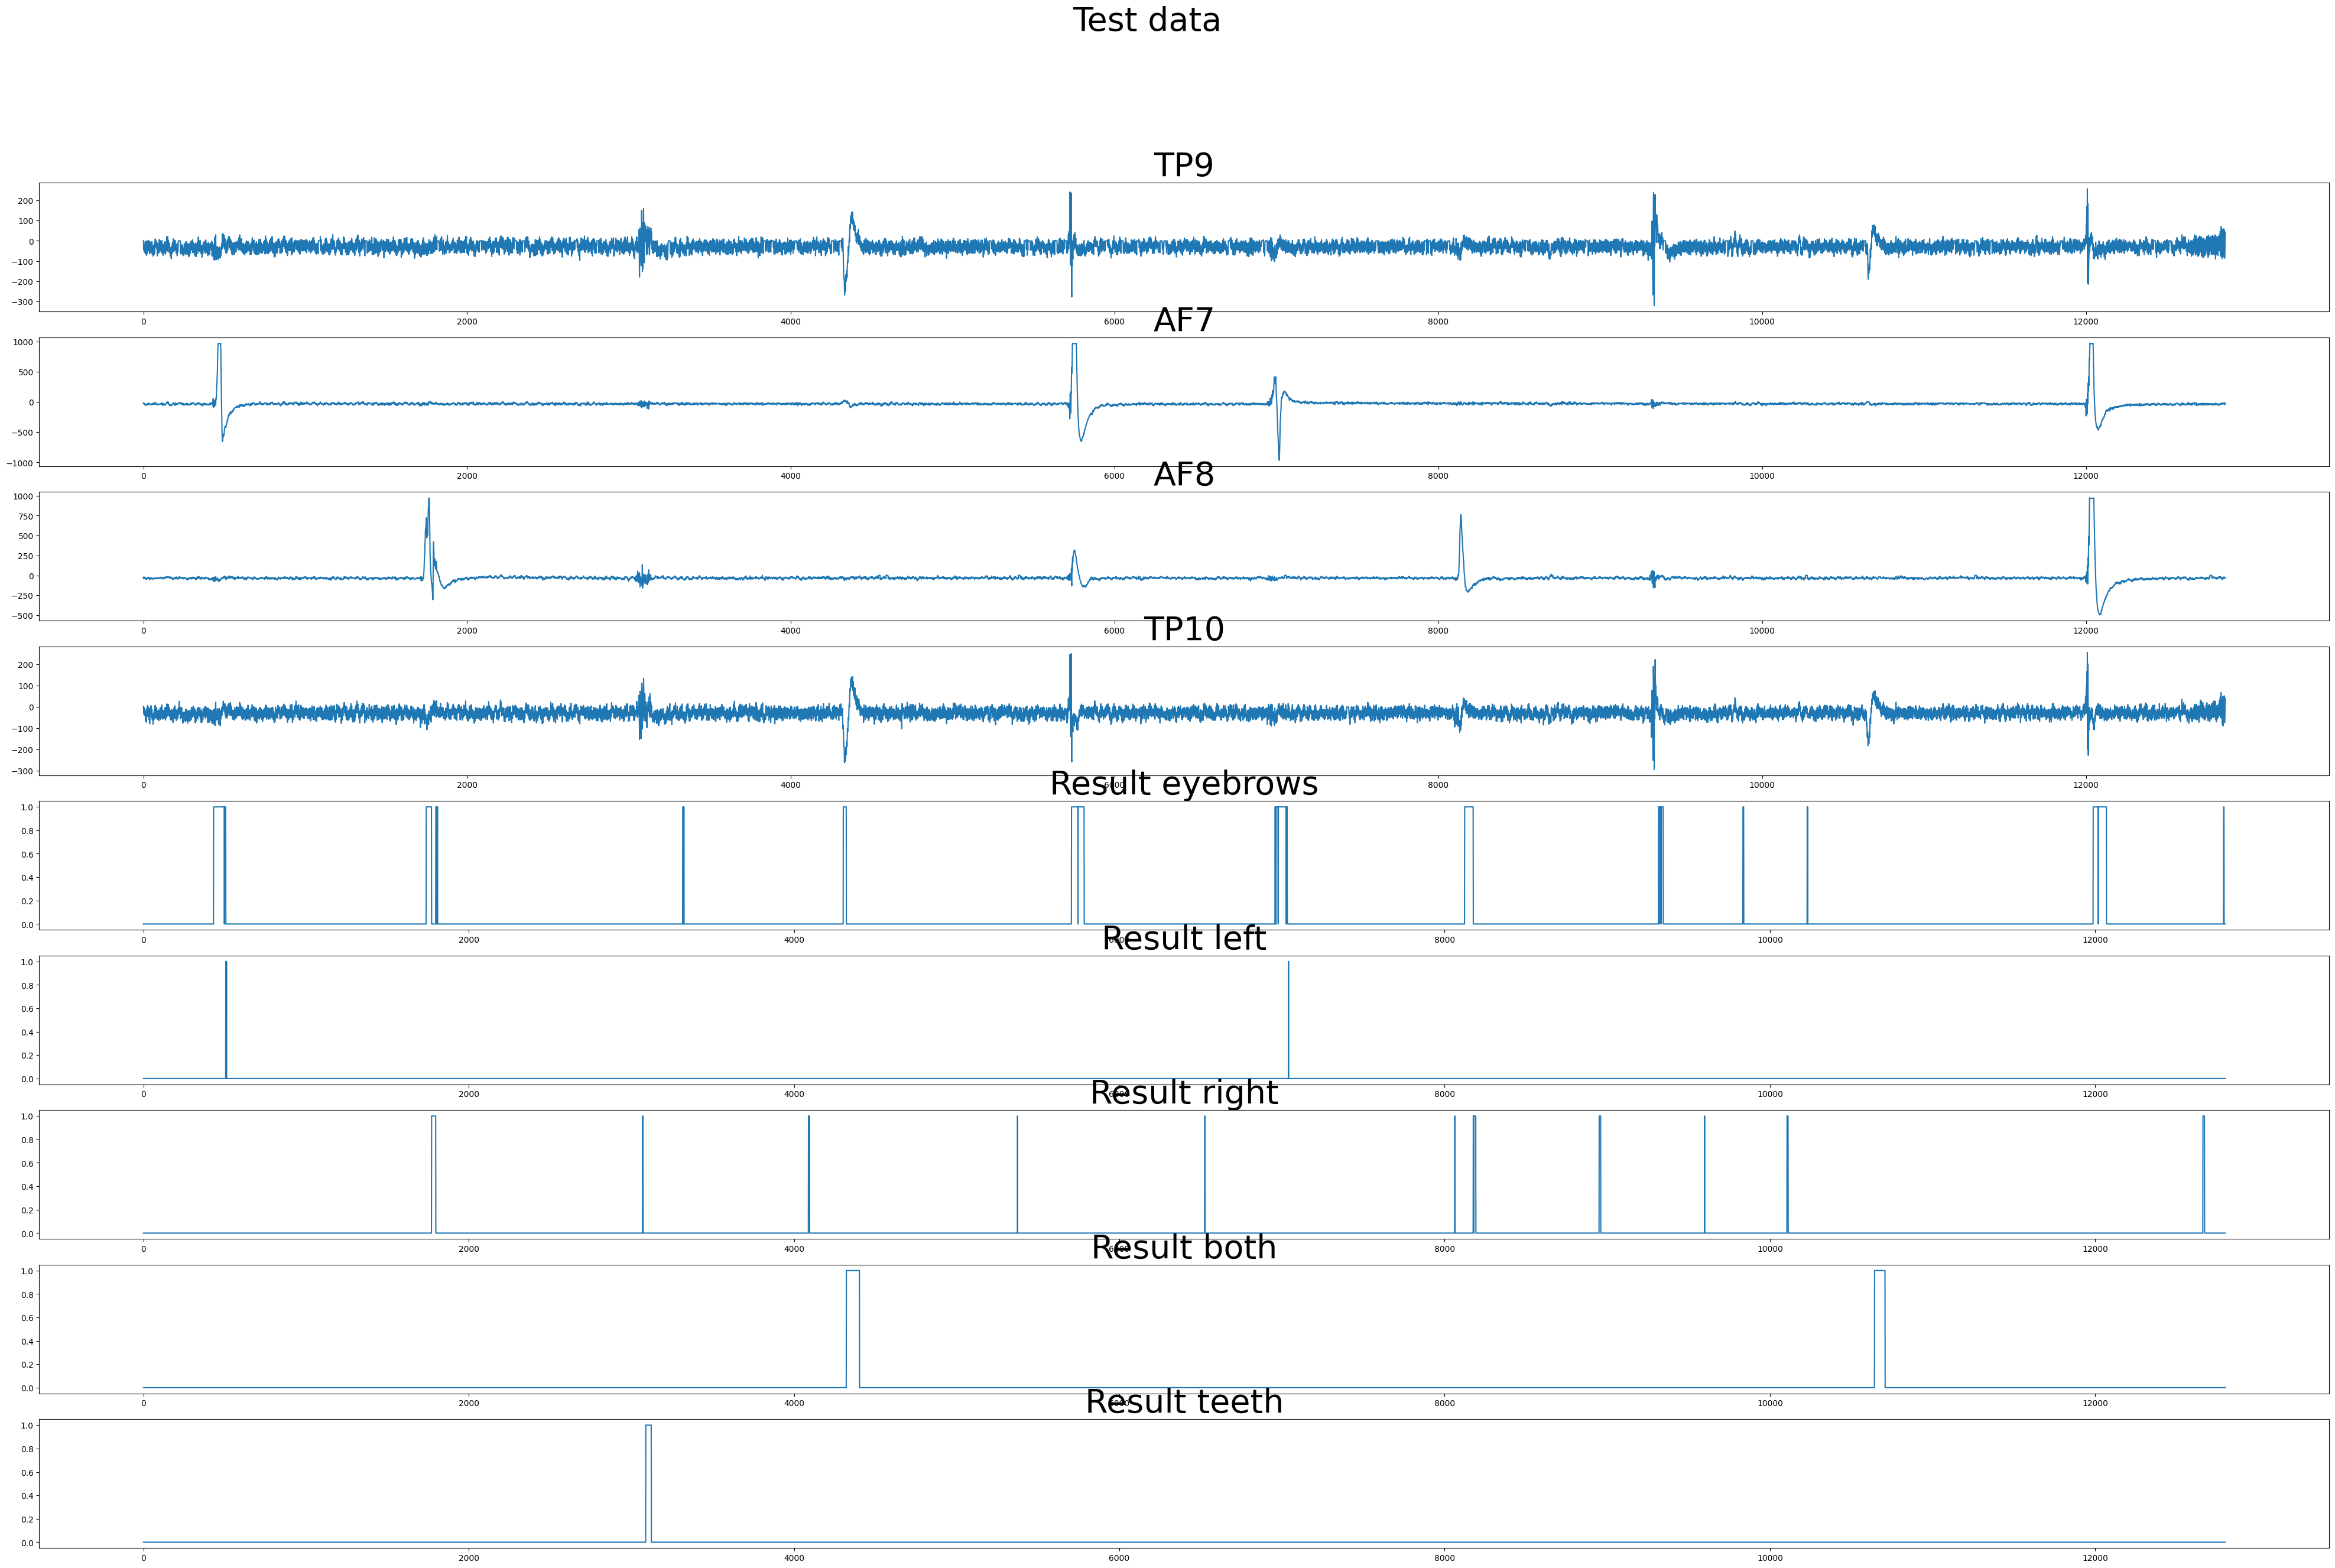

In [15]:
df_test = pd.read_csv(r'./raw_data/filter_test.csv').drop(columns=['timestamps', 'Right AUX'])
# Eyebrows inference dataset
data, input_data = get_input(df_test)
y_pred_onehot = get_output(input_data)
plot_data_result(data, y_pred_onehot, "Test data")

(100, 20, 128, 1)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


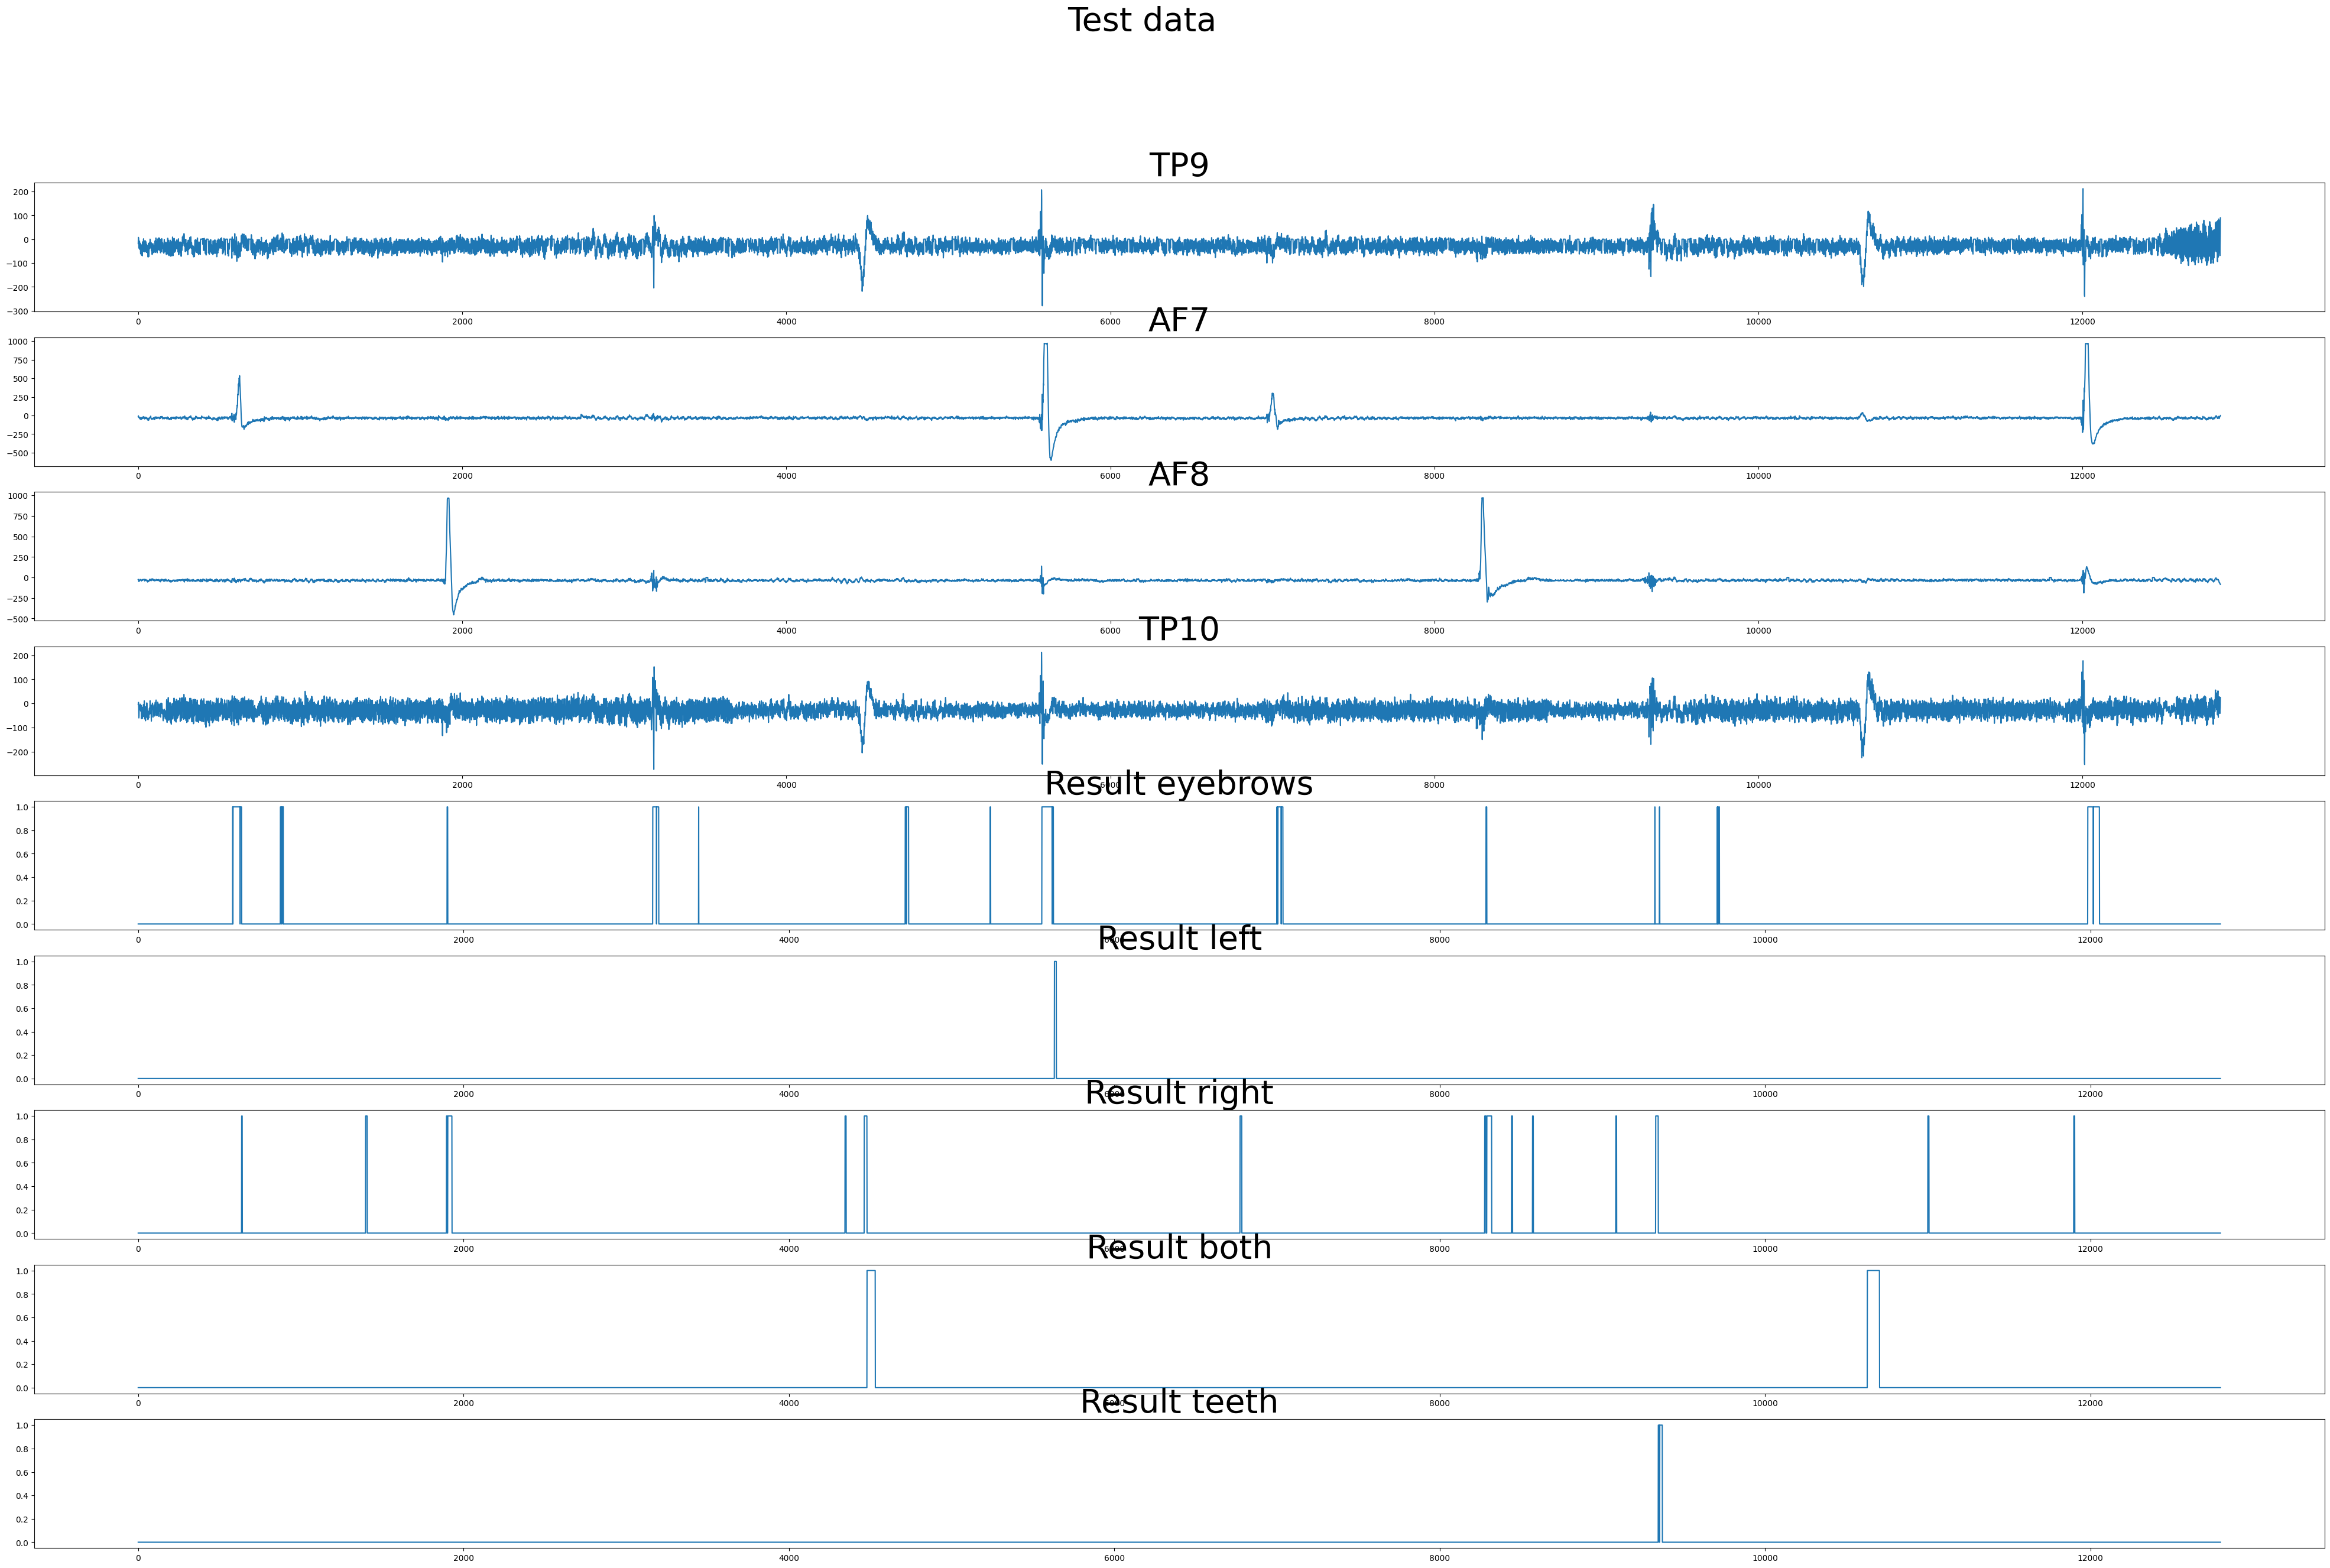

In [16]:
df_test = pd.read_csv(r'./raw_data/filter_test_2.csv').drop(columns=['timestamps', 'Right AUX'])
# Eyebrows inference dataset
data, input_data = get_input(df_test)
y_pred_onehot = get_output(input_data)
plot_data_result(data, y_pred_onehot, "Test data")